cumulative Infizierte
Verstorben, kumulativ auch

R Wert, Krankenbettauslastung

* RKI7incidence starting on 6th of March, 13 zeros added
* cases per day: starting 25th of Februrary 2020
* deaths and deathsCum starting on 3rd of March, 10 zeros added

In [23]:
# RKI7incidence = [zeros(13); RKI7incidence]
# deaths = [zeros(10); deaths]
# deathsCum = [zeros(10); deathsCum]
# @save "RKI.jld" RKI7incidence casesCum casesPerDay deathsCum deaths

In [2]:
using Pkg; Pkg.add("JLD")

In [3]:

using JLD, Plots, Statistics


In [4]:
#cd("/home/chris/work/covid/Numbers")
@load "RKI.jld"

5-element Vector{Symbol}:
 :RKI7incidence
 :casesCum
 :casesPerDay
 :deaths
 :deathsCum

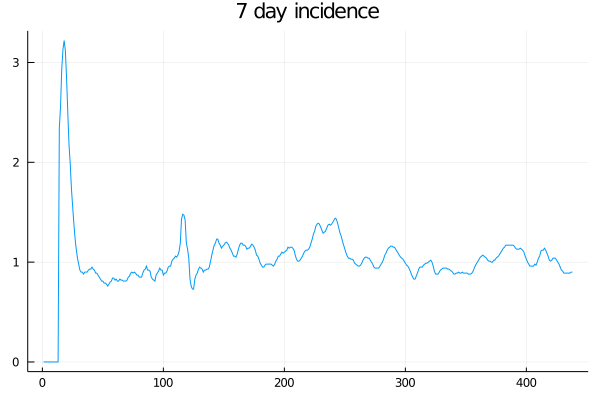

In [5]:
plot(RKI7incidence, title="7 day incidence", legend=:false)

In [8]:
range=30


days = []
for i in 1:length(RKI7incidence)
    append!(days,i)
end

av_inci = []

days .*= range
lastRange=Int(floor((length(RKI7incidence))/range))
days = days[1:lastRange]


for i in 1:lastRange
    avValue=mean(RKI7incidence[(i-1)*range+1:i*range])
    append!(av_inci,avValue)
end



In [16]:
window_size = 30
sliding_window_r = [mean(RKI7incidence[i:i+window_size]) for i in 1:(length(RKI7incidence)-window_size)];


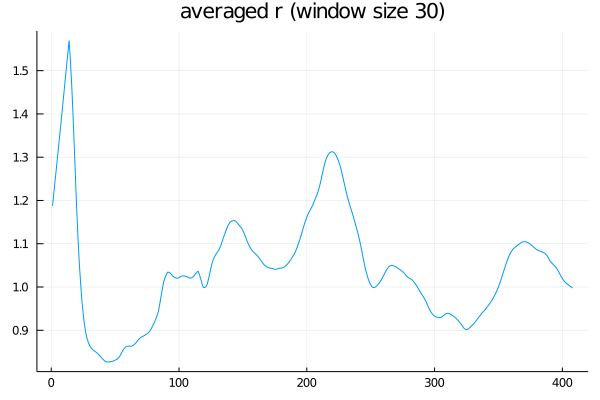

In [17]:
plot(sliding_window_r, title="averaged r (window size $(window_size))", legend=:false)

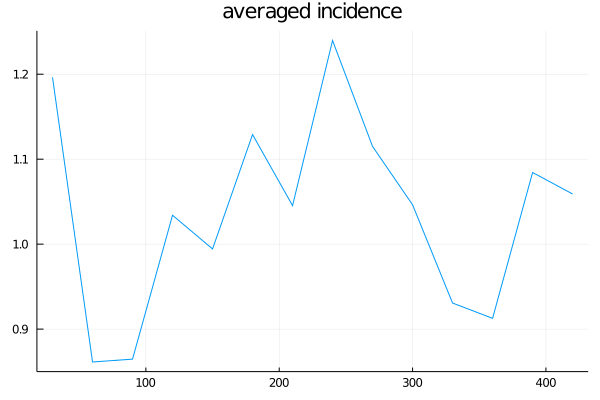

In [9]:
plot(days,av_inci, title="averaged incidence", legend=:false)

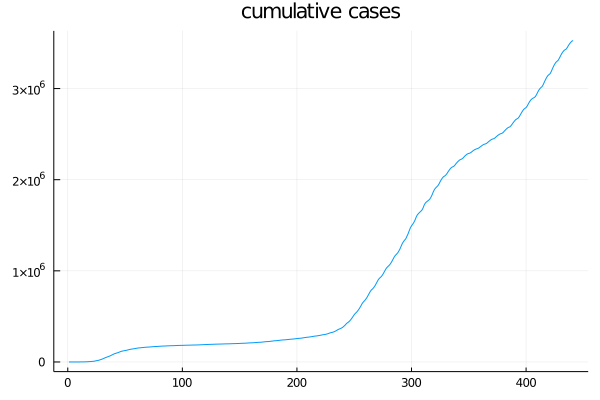

In [40]:
plot(casesCum, title="cumulative cases", legend=:false)

In [14]:
casesPerDay = []
for i in 1:length(casesCum)-1
    append!(casesPerDay,casesCum[i+1]-casesCum[i])
end

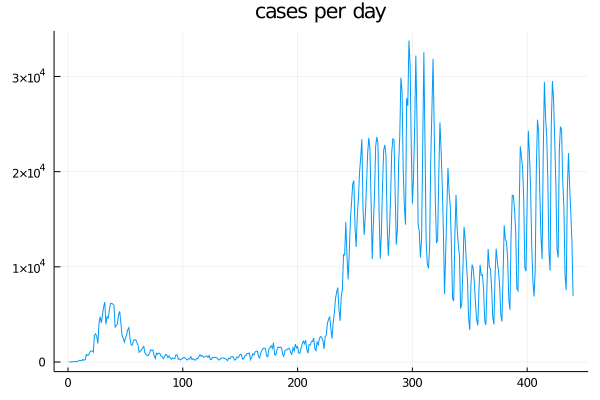

In [41]:
plot(casesPerDay, title="cases per day", legend=:false)

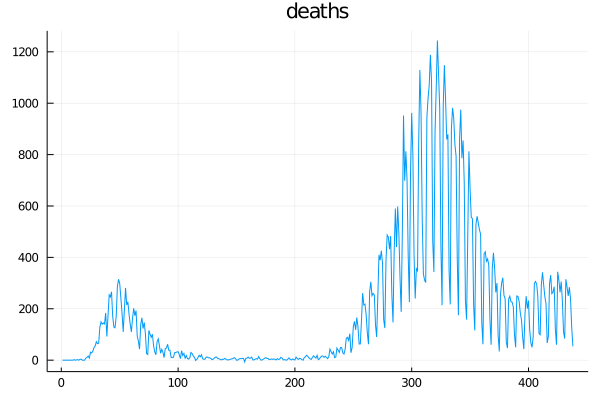

In [42]:
plot(deaths, title="deaths", legend=:false)

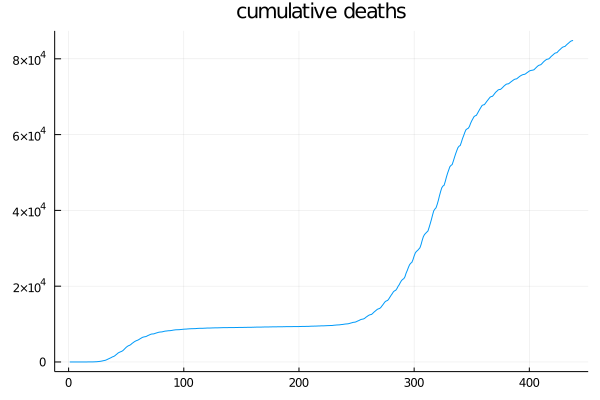

In [43]:
plot(deathsCum, title="cumulative deaths", legend=:false)